In [27]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Q.1-Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [11]:
file_path = 'C:/Users/rajsh/OneDrive/Desktop/python_3rd/Python Foundation Case Study 3 - Insurance Claims Case Study/'
Claims_data = pd.read_csv(file_path + 'claims.csv')
Claims_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [12]:
Cust_demo = pd.read_csv(file_path + 'cust_demographics.csv')
Cust_demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [13]:
df = pd.merge(left = Claims_data , right = Cust_demo , left_on = 'customer_id', right_on = 'CUST_ID', how = 'inner', indicator = True)
df


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,both
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,both
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,both
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,both
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,both
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,both
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,both
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,both


In [14]:
df=df.drop(columns = '_merge')
df.dropna(inplace = True)

## Q.2- Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1011 non-null   int64  
 1   customer_id          1011 non-null   int64  
 2   incident_cause       1011 non-null   object 
 3   claim_date           1011 non-null   object 
 4   claim_area           1011 non-null   object 
 5   police_report        1011 non-null   object 
 6   claim_type           1011 non-null   object 
 7   claim_amount         1011 non-null   object 
 8   total_policy_claims  1011 non-null   float64
 9   fraudulent           1011 non-null   object 
 10  CUST_ID              1011 non-null   int64  
 11  gender               1011 non-null   object 
 12  DateOfBirth          1011 non-null   object 
 13  State                1011 non-null   object 
 14  Contact              1011 non-null   object 
 15  Segment              1011 non-null   o

In [16]:
df.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum


In [19]:
df['claim_date'] = pd.to_datetime(df['claim_date'])
df['claim_amount'] = df['claim_amount'].astype(float)
df['Contact'] =pd.to_numeric(df['Contact'], errors='coerce').astype('Int64')
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'] , format = '%d-%b-%y')

In [ ]:
df.info()

## Q.3 - Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the sign.

In [18]:
df['claim_amount'] = df['claim_amount'].astype(str)
df['claim_amount'] = df['claim_amount'].str.replace('$','')
df['claim_amount'] = pd.to_numeric(df['claim_amount'])
df

C:\Users\rajsh\AppData\Local\Temp\ipykernel_7280\2073702940.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['claim_amount'] = df['claim_amount'].str.replace('$','')


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


## Q.4 -  Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [ ]:
df['flag'] = np.where(df.police_report == 'Unknown' ,0,1)
df

## Q.5 - One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. 

In [ ]:
df.drop_duplicates(subset = 'customer_id' , keep = 'first')
df.head(1)

## Q.6 - Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [ ]:
df['total_policy_claims'].isna().count()
df['claim_type'].isna().count()

In [ ]:
# categorical values
df['total_policy_claims'].fillna(df['total_policy_claims'].mode()[0], inplace=True)
df['claim_type'].fillna(df['claim_type'].mode()[0], inplace=True)
#continous values
df['claim_amount'].replace(np.NaN,df['claim_amount'].mean())
df

## Q.7 -  Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria 



In [ ]:
df['age'] = round((df.claim_date - df.DateOfBirth).apply(lambda x:x.days)/365.25, 2)
df.head(1)


In [36]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(df['DateOfBirth']).year            #extract year from DateOfBirth
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
df['age'] = (np.where(dob_year > curr_year,v,y))
#Categorising
df.loc[(df.age < 18),'AgeGroup'] = 'Children'
df.loc[(df.age >=18) & (df.age <30),'AgeGroup'] = 'Youth'
df.loc[(df.age >=30) & (df.age <60),'AgeGroup'] = 'Adult'
df.loc[(df.age >=60),'AgeGroup'] = 'Senior'
df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_month,Claim_month,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,<NA>,Platinum,2017-11-27,11,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,<NA>,Silver,2018-10-03,10,53,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,<NA>,Silver,2018-02-02,2,39,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,<NA>,Silver,2018-04-04,4,39,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,<NA>,Silver,2018-06-17,6,37,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,<NA>,Platinum,2018-09-06,9,42,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,<NA>,Silver,2017-05-09,5,27,Youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,<NA>,Gold,2017-05-15,5,33,Adult
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,2064-10-22,LA,<NA>,Silver,2017-04-18,4,59,Adult


## Q.8 -  What is the average amount claimed by the customers from various segments?


In [37]:
df.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_month,Claim_month,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,<NA>,Platinum,2017-11-27,11,44,Adult


In [38]:
df.groupby('Segment').mean()[['claim_amount']]

,claim_amount
Segment,
Gold,12723.927954
Platinum,12397.859420
Silver,12217.995298


## Q.9 -  What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [39]:
df.loc[df.claim_date < '2018-09-10' ].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                  662110.0
Driver error          3168250.0
Natural causes        1183331.5
Other causes          3486969.0
Other driver error    3053360.0
Name: claim_amount, dtype: float64

## Q.10 - How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [40]:
df.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_month,Claim_month,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,<NA>,Platinum,2017-11-27,11,44,Adult


In [41]:
df.loc[(df.incident_cause == 'Driver error') & ((df.State == 'TX') | (df.State == 'DE') | (df.State == 'AK'))].groupby(by = 'State')['State'].count()

State
AK    6
DE    9
TX    5
Name: State, dtype: int64

## Q.11 - Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


In [42]:
pr = df.groupby(by = ['gender', 'Segment'])[['claim_amount']].sum().reset_index()
pr

,gender,Segment,claim_amount
0,Female,Gold,1937899.0
1,Female,Platinum,2278700.0
2,Female,Silver,1739832.0
3,Male,Gold,2477304.0
4,Male,Platinum,1998561.5
5,Male,Silver,2157708.5


In [43]:
ch = pr.pivot(index = 'Segment',values = 'claim_amount', columns = 'gender')
ch

gender,Female,Male
Segment,,
Gold,1937899.0,2477304.0
Platinum,2278700.0,1998561.5
Silver,1739832.0,2157708.5


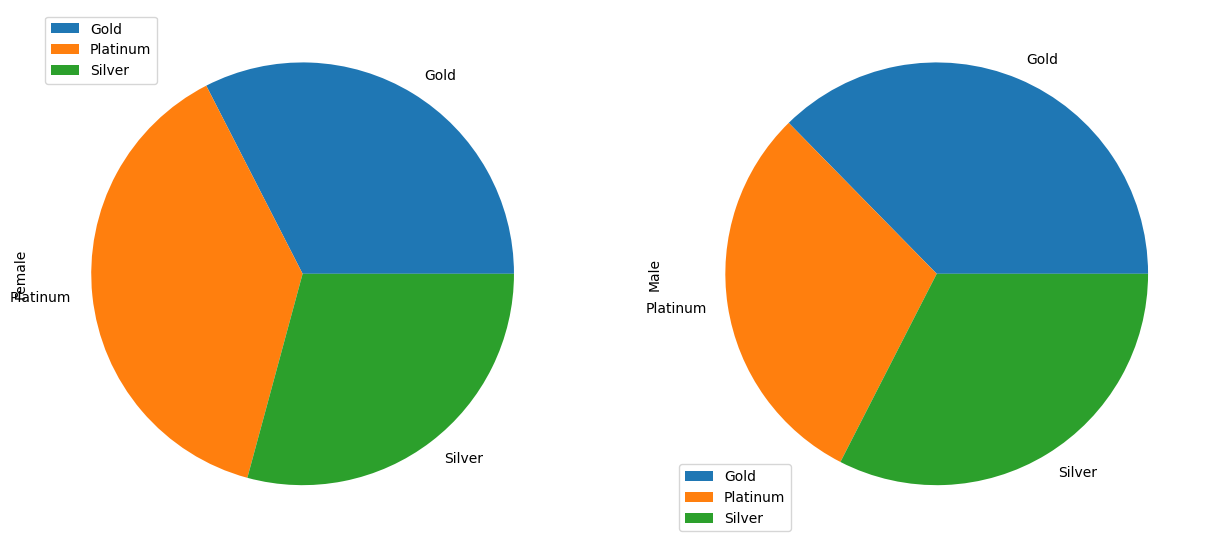

In [44]:
ch.plot(kind = 'pie', subplots = True  ,figsize = (15,8))
plt.show()

## Q.12- Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


In [45]:
fig = df.loc[df.incident_cause == 'Driver'].groupby(by = 'gender')[['gender']].count()
fig

,gender
gender,


In [46]:
f2 = df.loc[(df.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("Count_of_").reset_index()
f2

,gender,Count_of_gender
0,Female,205
1,Male,265


In [47]:
df.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_month,Claim_month,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,<NA>,Platinum,2017-11-27,11,44,Adult


<AxesSubplot:>

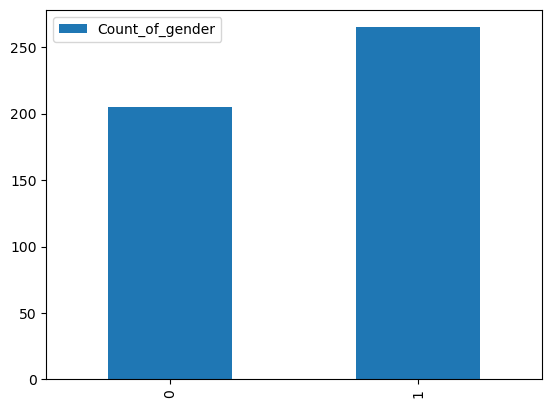

In [48]:
f2.plot(kind = 'bar')

## Q.13 - Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


In [49]:
df.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_month,Claim_month,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,<NA>,Platinum,2017-11-27,11,44,Adult


<AxesSubplot:xlabel='AgeGroup'>

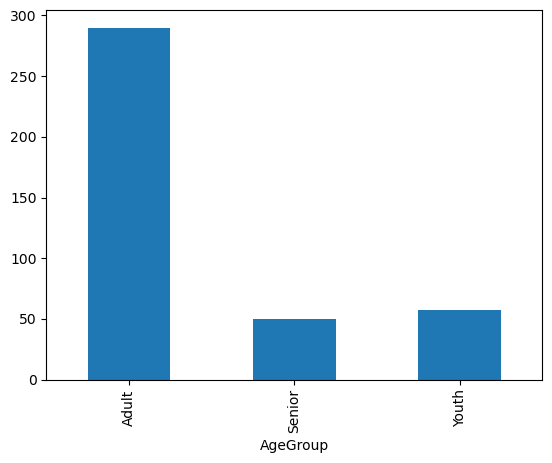

In [50]:
I = df.loc[df.fraudulent == 'Yes']
group_age = I.groupby(['AgeGroup'])['total_policy_claims'].sum()
group_age.plot(kind = 'bar')

## Q.14 - Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [51]:
df.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_month,Claim_month,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,<NA>,Platinum,2017-11-27,11,44,Adult


In [52]:
df['claim_month'] = pd.to_datetime(df['claim_date'])
df['Claim_month'] = df['claim_date'].dt.month
df.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_month,Claim_month,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,<NA>,Platinum,2017-11-27,11,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,<NA>,Silver,2018-10-03,10,53,Adult


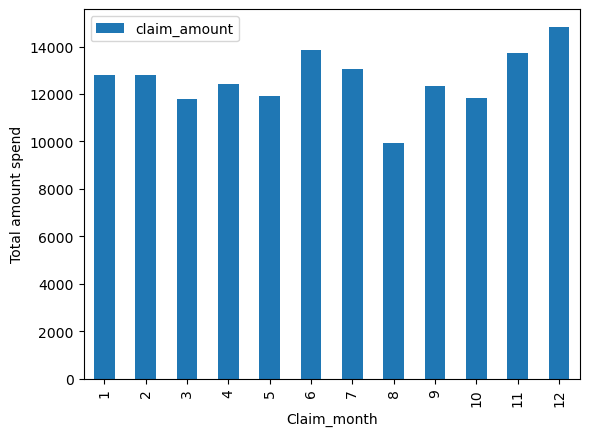

In [53]:
pd.pivot_table(df,index="Claim_month",values="claim_amount").plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()

## Q.15- What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


In [54]:
fraudulent_claims = pd.DataFrame(df.loc[(df.fraudulent=='Yes')].groupby(['gender' ,'AgeGroup'])[['claim_amount']].mean().add_prefix('Fraud_'))
non_fraudulent_claims = pd.DataFrame(df.loc[(df.fraudulent=='No')].groupby(['gender','AgeGroup'])[['claim_amount']].mean().add_prefix('Non_Fraud_'))

In [55]:
Claims_age_gender=round(pd.merge(fraudulent_claims,non_fraudulent_claims, on=["gender","AgeGroup"]),2)

In [56]:
Claims_age_gender

Fraud_claim_amount  Non_Fraud_claim_amount
gender AgeGroup                                            
Female Adult               12664.61                12063.01
       Senior               3332.29                13539.26
       Youth                9807.86                13241.43
Male   Adult               15803.40                12072.83
       Senior              19463.11                11013.75
       Youth                8683.32                13345.51

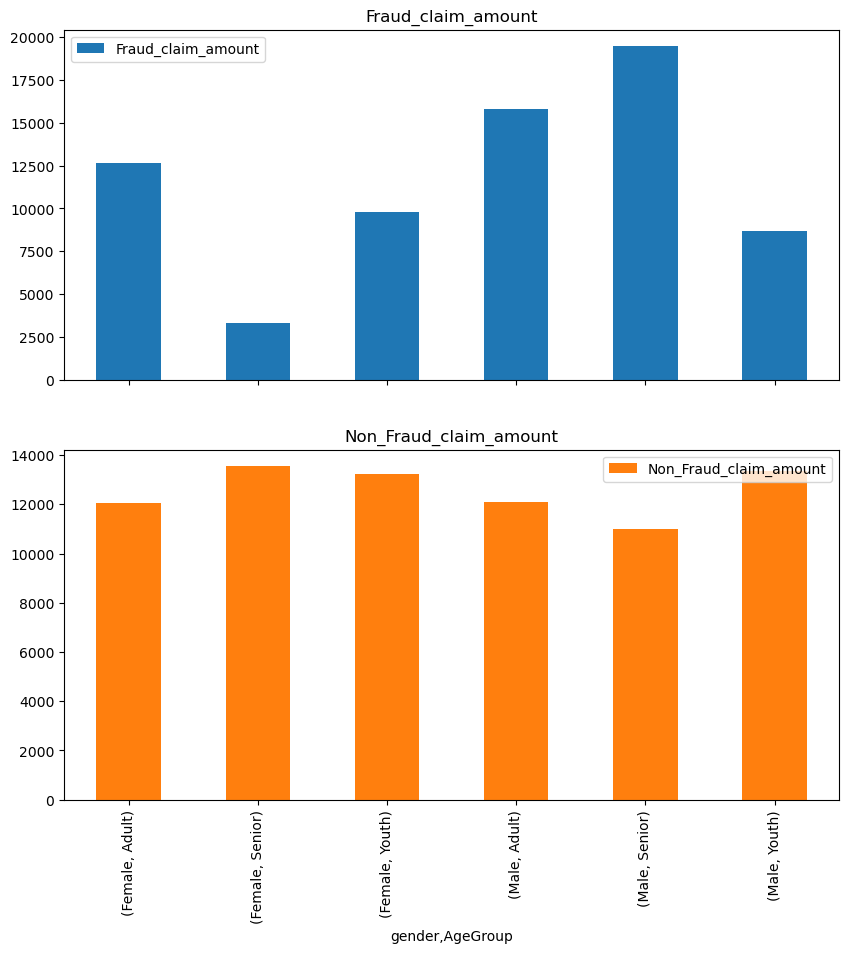

In [57]:
Claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()

## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

## Q.16- Is there any similarity in the amount claimed by males and females?

In [ ]:
claim_male = df['claim_amount'].loc[df.gender == 'Male']
claim_female = df['claim_amount'].loc[df.gender == 'Female']


In [ ]:
print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))

In [ ]:
# H0: u1 = u2
# Ha: u1 <> u2
# CI: 95%, p: 0.05

stats.ttest_ind( claim_male, claim_female )

# business conclusion
#pvalue is greater then the 0.05,we can safely conclude that there is a similarity between amount claimed by males and females

## Q.17- Is there any relationship between age category and segment?


In [ ]:
df.head(1)

In [ ]:
# get the ob_freq_table from the dataset
obs_freq = pd.crosstab( df.AgeGroup, df.Segment )
obs_freq

In [ ]:
# Ho: No relationship
# Ha: Association
# CI: 99%, p: 0.01

# perform the test 
stats.chi2_contingency( obs_freq )

# output: At 99% CI we can reject the H0
# business conclusion
# value of p is greater then 0.01. we fail to reject the null hypothesis, so there is no relationship b/w age category and segment.

## Q.18- The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [ ]:
df.head(1)

In [23]:
#sample to be considered
var = 'claim_amount'

#mean values to be compared
pop_mean = 10000
sample = df.loc[:, var]
mean_sample = sample.mean()

# display the means
print('pop_mean: ', pop_mean, '| sample mean: ', mean_sample )

pop_mean:  10000 | sample mean:  12453.021760633037


In [26]:
# H0: u <= 10000
# Ha: u > 10000
# CI: 99%, p: 0.01

# perform the test
stats.ttest_1samp( a = sample, popmean = pop_mean )

#Business conclusion
#pvalue is low, the current year has shown a significant rise in claim amounts

Ttest_1sampResult(statistic=5.664288191149643, pvalue=1.924273193313905e-08)

## Q.19- Is there any difference between age groups and insurance claims?

In [48]:
df.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,<NA>,Platinum,1,44,Adult


In [35]:
# get the num of segments
df.AgeGroup.nunique()

3

In [36]:
# get the freq of insurance claims
df.total_policy_claims.value_counts()

1.0    736
2.0    101
3.0     80
4.0     57
5.0     25
6.0      9
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [45]:
a1 = df['total_policy_claims'].loc[df['AgeGroup']=="Youth"]
a2 = df['total_policy_claims'].loc[df['AgeGroup']=="Adult"]
a3 = df['total_policy_claims'].loc[df['AgeGroup']=="Senior"]

# display the mean of the three sample
print( 'mean of a1: ', a1.mean(), '| mean of a2: ', a2.mean(), '| mean of a3: ', a3.mean() )


mean of a1:  1.6625 | mean of a2:  1.5765171503957784 | mean of a3:  1.5698924731182795


In [49]:
# Ho: All the samples are from SAME population, means are EQUAL
# Ha: Samples are from DIFFERENT population, means are UNEQUAL
# CI: 99%, p: 0.01

# perform the test
stats.f_oneway( a1, a2, a3 )

# conclusion
#pvalue high,so no difference between age group and insurance claims

F_onewayResult(statistic=0.38575713517410803, pvalue=0.6800359715230352)

## Q.20-  Is there any relationship between total number of policy claims and the claimed amount?

In [50]:
df.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,<NA>,Platinum,1,44,Adult


In [51]:
df.loc[:, ['total_policy_claims', 'claim_amount']].corr()

,total_policy_claims,claim_amount
total_policy_claims,1.000000,-0.018087
claim_amount,-0.018087,1.000000


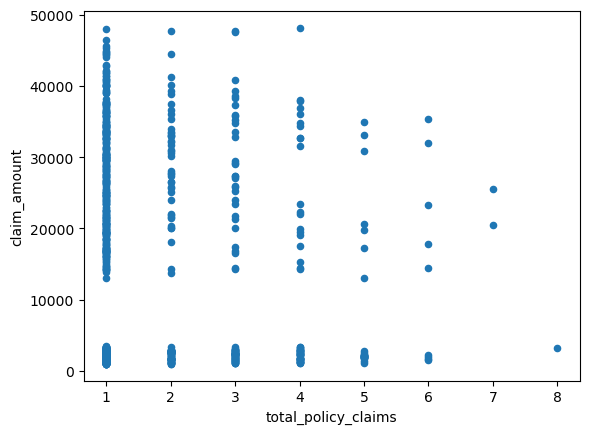

In [59]:
df.plot( kind = 'scatter', x = 'total_policy_claims', y = 'claim_amount' )
plt.show()

In [54]:
# Ho: No relationship
# Ha: Association
# CI: 95%, p: 0.05

# perform the test 
stats.pearsonr( df.total_policy_claims, df.claim_amount)

#conclusion
#there is no relationship b/w these two

PearsonRResult(statistic=-0.01808658678959947, pvalue=0.5656831148630279)